# WEATHER REPORT OF SZEGED HUNGARY FOR YEARS FROM 2006 - 2016


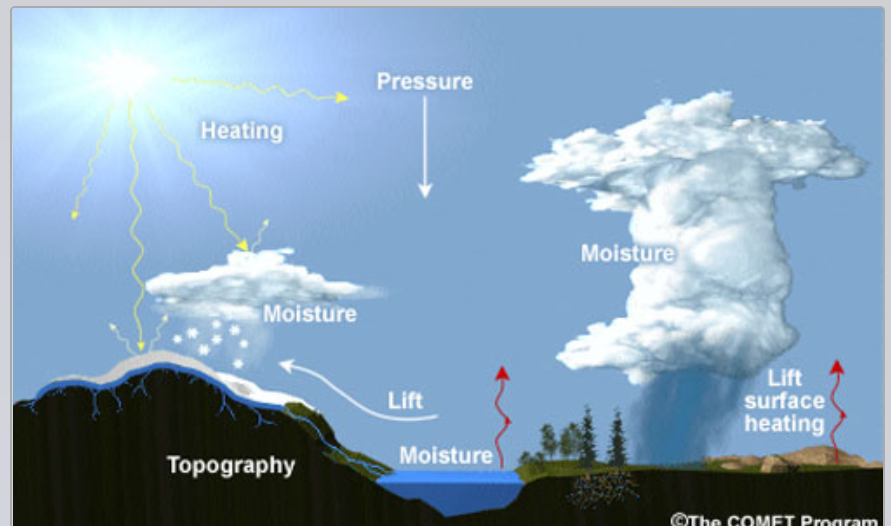

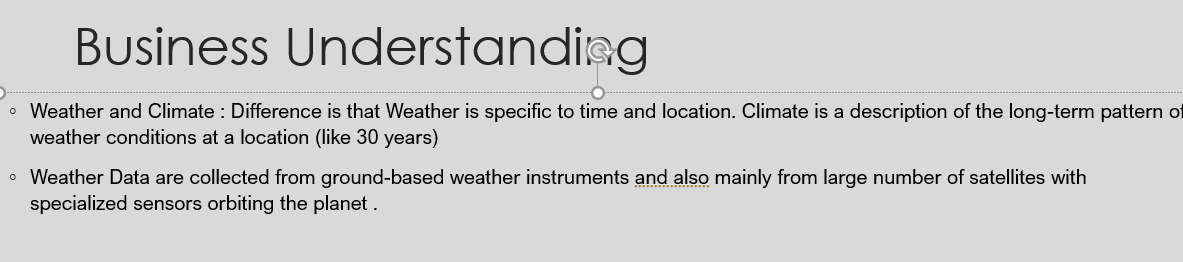

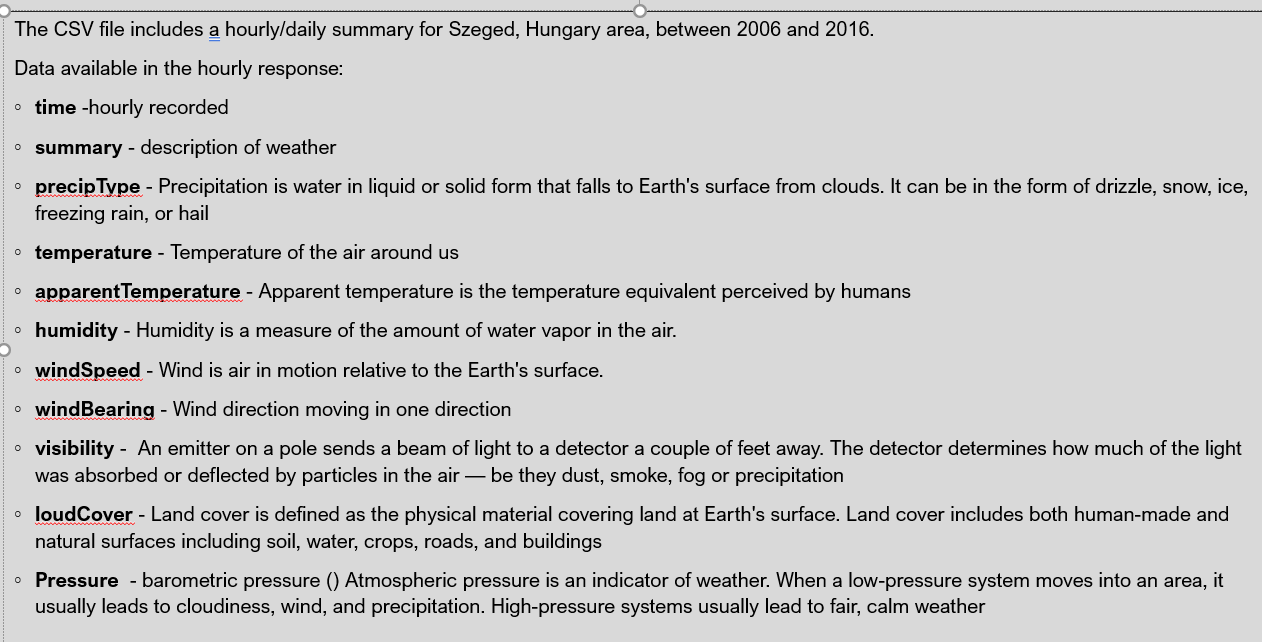

# DATA PREPARATION(EDA)

In [61]:
#DATA PREPARATION
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
os.chdir(r'C:\Users\metro\Python\Mycode')
os.getcwd()

'C:\\Users\\metro\\Python\\Mycode'

In [62]:
#IMPORTING REQUIRED PYTHON LIBRARIES
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
import pandas_profiling

#Work with datetime Columns
import datetime

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

#To perform Statisitics 
import scipy.stats


  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip (34.6 MB)
  Created wheel for pandas-profiling: filename=pandas_profiling-2.12.0-py2.py3-none-any.whl size=243837 sha256=1fd8aa7b17949b059d50135e42a996c1c686fb9b51ea2d7c3515fb75bce2d9a6
  Stored in directory: C:\Users\Fujitsu\AppData\Local\Temp\pip-ephem-wheel-cache-axvzcoun\wheels\64\b6\85\dfc808b23666a5910371784e349d28818006ff63ed9cfeca59
Successfully built pandas-profiling


In [63]:
#IGNORE WARNING
import warnings
warnings.filterwarnings('ignore')

In [64]:
#DATA PREPARATION
weather_data = pd.read_csv('weatherHistory.csv',na_values='NA')

In [65]:
#COPY OF DATASET
weather_data_Original=weather_data[:]

In [66]:
weather_data.shape

(96453, 12)

In [173]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [174]:
weather_data.head(7)

Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   
5  2006-04-01 05:00:00.000 +0200  Partly Cloudy        rain         9.222222   
6  2006-04-01 06:00:00.000 +0200  Partly Cloudy        rain         7.733333   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   
5                  7.111111      0.85            13.9587   
6                  5.522222      0.95            12.3648   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13   
1                   259.0          15.8263         0.0               1015.63   
2                   204.0          14.9569         0.0               1015.94   
3                   269.0          15.8263         0.0               1016.41   
4                   259.0          15.8263         0.0               1016.51   
5                   258.0          14.9569         0.0               1016.66   
6                   259.0           9.9820         0.0               1016.72   

                       Daily Summary  
0  Partly cloudy throughout the day.  
1  Partly cloudy throughout the day.  
2  Partly cloudy throughout the day.  
3  Partly cloudy throughout the day.  
4  Partly cloudy throughout the day.  
5  Partly cloudy throughout the day.  
6  Partly cloudy throughout the day.

In [175]:
weather_data.tail(7)

Formatted Date        Summary Precip Type  \
96446  2016-09-09 17:00:00.000 +0200  Partly Cloudy        rain   
96447  2016-09-09 18:00:00.000 +0200  Partly Cloudy        rain   
96448  2016-09-09 19:00:00.000 +0200  Partly Cloudy        rain   
96449  2016-09-09 20:00:00.000 +0200  Partly Cloudy        rain   
96450  2016-09-09 21:00:00.000 +0200  Partly Cloudy        rain   
96451  2016-09-09 22:00:00.000 +0200  Partly Cloudy        rain   
96452  2016-09-09 23:00:00.000 +0200  Partly Cloudy        rain   

       Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
96446        30.766667                 29.311111      0.28            14.2163   
96447        28.838889                 27.850000      0.32            12.2038   
96448        26.016667                 26.016667      0.43            10.9963   
96449        24.583333                 24.583333      0.48            10.0947   
96450        22.038889                 22.038889      0.56             8.9838   
96451        21.522222                 21.522222      0.60            10.5294   
96452        20.438889                 20.438889      0.61             5.8765   

       Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
96446                    24.0          15.5526         0.0   
96447                    21.0          16.1000         0.0   
96448                    31.0          16.1000         0.0   
96449                    20.0          15.5526         0.0   
96450                    30.0          16.1000         0.0   
96451                    20.0          16.1000         0.0   
96452                    39.0          15.5204         0.0   

       Pressure (millibars)                           Daily Summary  
96446               1013.83  Partly cloudy starting in the morning.  
96447               1014.07  Partly cloudy starting in the morning.  
96448               1014.36  Partly cloudy starting in the morning.  
96449               1015.16  Partly cloudy starting in the morning.  
96450               1015.66  Partly cloudy starting in the morning.  
96451               1015.95  Partly cloudy starting in the morning.  
96452               1016.16  Partly cloudy starting in the morning.

## Duplicated VALUES

In [67]:
sum(weather_data.duplicated())#only 24 duplicates 

24

In [8]:
ids = weather_data["Formatted Date"]
weather_data[ids.isin(ids[ids.duplicated()])].sort_values("Formatted Date")

Formatted Date        Summary Precip Type  \
8040   2010-08-02 00:00:00.000 +0200          Clear        rain   
36072  2010-08-02 00:00:00.000 +0200          Clear        rain   
36073  2010-08-02 01:00:00.000 +0200          Clear        rain   
8041   2010-08-02 01:00:00.000 +0200          Clear        rain   
8042   2010-08-02 02:00:00.000 +0200          Clear        rain   
36074  2010-08-02 02:00:00.000 +0200          Clear        rain   
8043   2010-08-02 03:00:00.000 +0200          Clear        rain   
36075  2010-08-02 03:00:00.000 +0200          Clear        rain   
8044   2010-08-02 04:00:00.000 +0200          Clear        rain   
36076  2010-08-02 04:00:00.000 +0200          Clear        rain   
8045   2010-08-02 05:00:00.000 +0200          Clear        rain   
36077  2010-08-02 05:00:00.000 +0200          Clear        rain   
8046   2010-08-02 06:00:00.000 +0200          Clear        rain   
36078  2010-08-02 06:00:00.000 +0200          Clear        rain   
8047   2010-08-02 07:00:00.000 +0200          Clear        rain   
36079  2010-08-02 07:00:00.000 +0200          Clear        rain   
36080  2010-08-02 08:00:00.000 +0200          Clear        rain   
8048   2010-08-02 08:00:00.000 +0200          Clear        rain   
36081  2010-08-02 09:00:00.000 +0200          Clear        rain   
8049   2010-08-02 09:00:00.000 +0200          Clear        rain   
36082  2010-08-02 10:00:00.000 +0200          Clear        rain   
8050   2010-08-02 10:00:00.000 +0200          Clear        rain   
36083  2010-08-02 11:00:00.000 +0200          Clear        rain   
8051   2010-08-02 11:00:00.000 +0200          Clear        rain   
36084  2010-08-02 12:00:00.000 +0200          Clear        rain   
8052   2010-08-02 12:00:00.000 +0200          Clear        rain   
36085  2010-08-02 13:00:00.000 +0200  Partly Cloudy        rain   
8053   2010-08-02 13:00:00.000 +0200  Partly Cloudy        rain   
8054   2010-08-02 14:00:00.000 +0200  Partly Cloudy        rain   
36086  2010-08-02 14:00:00.000 +0200  Partly Cloudy        rain   
36087  2010-08-02 15:00:00.000 +0200  Partly Cloudy        rain   
8055   2010-08-02 15:00:00.000 +0200  Partly Cloudy        rain   
36088  2010-08-02 16:00:00.000 +0200  Partly Cloudy        rain   
8056   2010-08-02 16:00:00.000 +0200  Partly Cloudy        rain   
36089  2010-08-02 17:00:00.000 +0200  Partly Cloudy        rain   
8057   2010-08-02 17:00:00.000 +0200  Partly Cloudy        rain   
8058   2010-08-02 18:00:00.000 +0200  Partly Cloudy        rain   
36090  2010-08-02 18:00:00.000 +0200  Partly Cloudy        rain   
36091  2010-08-02 19:00:00.000 +0200          Clear        rain   
8059   2010-08-02 19:00:00.000 +0200          Clear        rain   
36092  2010-08-02 20:00:00.000 +0200          Clear        rain   
8060   2010-08-02 20:00:00.000 +0200          Clear        rain   
36093  2010-08-02 21:00:00.000 +0200          Clear        rain   
8061   2010-08-02 21:00:00.000 +0200          Clear        rain   
36094  2010-08-02 22:00:00.000 +0200  Partly Cloudy        rain   
8062   2010-08-02 22:00:00.000 +0200  Partly Cloudy        rain   
8063   2010-08-02 23:00:00.000 +0200          Clear        rain   
36095  2010-08-02 23:00:00.000 +0200          Clear        rain   

       Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
8040         18.800000                 18.800000      0.93             6.2790   
36072        18.800000                 18.800000      0.93             6.2790   
36073        18.222222                 18.222222      0.97             6.2790   
8041         18.222222                 18.222222      0.97             6.2790   
8042         18.072222                 18.072222      0.98            11.2700   
36074        18.072222                 18.072222      0.98            11.2700   
8043         16.622222                 16.622222      0.99             6.4400   
36075        16.622222                 16.622222      0.99             6.4400   
8044     

In [178]:
#Another method Useful
pd.concat(g for _, g in weather_data.groupby("Formatted Date") if len(g) > 1)

Formatted Date        Summary Precip Type  \
8040   2010-08-02 00:00:00.000 +0200          Clear        rain   
36072  2010-08-02 00:00:00.000 +0200          Clear        rain   
8041   2010-08-02 01:00:00.000 +0200          Clear        rain   
36073  2010-08-02 01:00:00.000 +0200          Clear        rain   
8042   2010-08-02 02:00:00.000 +0200          Clear        rain   
36074  2010-08-02 02:00:00.000 +0200          Clear        rain   
8043   2010-08-02 03:00:00.000 +0200          Clear        rain   
36075  2010-08-02 03:00:00.000 +0200          Clear        rain   
8044   2010-08-02 04:00:00.000 +0200          Clear        rain   
36076  2010-08-02 04:00:00.000 +0200          Clear        rain   
8045   2010-08-02 05:00:00.000 +0200          Clear        rain   
36077  2010-08-02 05:00:00.000 +0200          Clear        rain   
8046   2010-08-02 06:00:00.000 +0200          Clear        rain   
36078  2010-08-02 06:00:00.000 +0200          Clear        rain   
8047   2010-08-02 07:00:00.000 +0200          Clear        rain   
36079  2010-08-02 07:00:00.000 +0200          Clear        rain   
8048   2010-08-02 08:00:00.000 +0200          Clear        rain   
36080  2010-08-02 08:00:00.000 +0200          Clear        rain   
8049   2010-08-02 09:00:00.000 +0200          Clear        rain   
36081  2010-08-02 09:00:00.000 +0200          Clear        rain   
8050   2010-08-02 10:00:00.000 +0200          Clear        rain   
36082  2010-08-02 10:00:00.000 +0200          Clear        rain   
8051   2010-08-02 11:00:00.000 +0200          Clear        rain   
36083  2010-08-02 11:00:00.000 +0200          Clear        rain   
8052   2010-08-02 12:00:00.000 +0200          Clear        rain   
36084  2010-08-02 12:00:00.000 +0200          Clear        rain   
8053   2010-08-02 13:00:00.000 +0200  Partly Cloudy        rain   
36085  2010-08-02 13:00:00.000 +0200  Partly Cloudy        rain   
8054   2010-08-02 14:00:00.000 +0200  Partly Cloudy        rain   
36086  2010-08-02 14:00:00.000 +0200  Partly Cloudy        rain   
8055   2010-08-02 15:00:00.000 +0200  Partly Cloudy        rain   
36087  2010-08-02 15:00:00.000 +0200  Partly Cloudy        rain   
8056   2010-08-02 16:00:00.000 +0200  Partly Cloudy        rain   
36088  2010-08-02 16:00:00.000 +0200  Partly Cloudy        rain   
8057   2010-08-02 17:00:00.000 +0200  Partly Cloudy        rain   
36089  2010-08-02 17:00:00.000 +0200  Partly Cloudy        rain   
8058   2010-08-02 18:00:00.000 +0200  Partly Cloudy        rain   
36090  2010-08-02 18:00:00.000 +0200  Partly Cloudy        rain   
8059   2010-08-02 19:00:00.000 +0200          Clear        rain   
36091  2010-08-02 19:00:00.000 +0200          Clear        rain   
8060   2010-08-02 20:00:00.000 +0200          Clear        rain   
36092  2010-08-02 20:00:00.000 +0200          Clear        rain   
8061   2010-08-02 21:00:00.000 +0200          Clear        rain   
36093  2010-08-02 21:00:00.000 +0200          Clear        rain   
8062   2010-08-02 22:00:00.000 +0200  Partly Cloudy        rain   
36094  2010-08-02 22:00:00.000 +0200  Partly Cloudy        rain   
8063   2010-08-02 23:00:00.000 +0200          Clear        rain   
36095  2010-08-02 23:00:00.000 +0200          Clear        rain   

       Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
8040         18.800000                 18.800000      0.93             6.2790   
36072        18.800000                 18.800000      0.93             6.2790   
8041         18.222222                 18.222222      0.97             6.2790   
36073        18.222222                 18.222222      0.97             6.2790   
8042         18.072222                 18.072222      0.98            11.2700   
36074        18.072222                 18.072222      0.98            11.2700   
8043         16.622222                 16.622222      0.99             6.4400   
36075        16.622222                 16.622222      0.99             6.4400   
8044     

In [68]:
weather_data_train=weather_data.drop_duplicates()

In [69]:
weather_data_train.shape #original data set had (96453, 12),after dropping duplicated data it is (96429, 12)

(96429, 12)

In [181]:
from pandas_profiling import ProfileReport

In [36]:
pandas_profiling.ProfileReport(weather_data_train)

# Missing values

In [70]:
# counting missing values
weather_data_train.apply(lambda x: sum(x.isnull()))

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [183]:
weather_data_train.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

# The statistical summary of the dataset¶

In [184]:
weather_data_train.astype('object').describe().transpose()

count unique                                top  \
Formatted Date            96429  96429      2006-09-28 01:00:00.000 +0200   
Summary                   96429     27                      Partly Cloudy   
Precip Type               95912      2                               rain   
Temperature (C)           96429   7574                            7.22222   
Apparent Temperature (C)  96429   8984                            12.7778   
Humidity                  96429     90                               0.93   
Wind Speed (km/h)         96429   2484                               3.22   
Wind Bearing (degrees)    96429    360                                  0   
Visibility (km)           96429    949                              9.982   
Loud Cover                96429      1                                  0   
Pressure (millibars)      96429   4979                                  0   
Daily Summary             96429    214  Mostly cloudy throughout the day.   

                           freq  
Formatted Date                1  
Summary                   31726  
Precip Type               85200  
Temperature (C)             455  
Apparent Temperature (C)    378  
Humidity                   5707  
Wind Speed (km/h)          2440  
Wind Bearing (degrees)     2262  
Visibility (km)           18277  
Loud Cover                96429  
Pressure (millibars)       1288  
Daily Summary             20085

# SEPARATING Categroical and Numerical Columns

In [71]:
#Categorical variables:
qualitative = weather_data_train.select_dtypes(include = ["object"]).keys()
print(qualitative)

Index(['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary'], dtype='object')


In [72]:
##numerical variables:
quantitative = weather_data_train.select_dtypes(include = ["int64","float64"]).keys()
print(quantitative)

Index(['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Loud Cover', 'Pressure (millibars)'],
      dtype='object')


In [73]:
#FIVE NUMBER SUMMARY
weather_data_train[quantitative].describe()

Temperature (C)  Apparent Temperature (C)      Humidity  \
count     96429.000000              96429.000000  96429.000000   
mean         11.929692                 10.851707      0.734902   
std           9.550492                 10.695743      0.195466   
min         -21.822222                -27.716667      0.000000   
25%           4.683333                  2.311111      0.600000   
50%          12.000000                 12.000000      0.780000   
75%          18.838889                 18.838889      0.890000   
max          39.905556                 39.344444      1.000000   

       Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
count       96429.000000            96429.000000     96429.000000     96429.0   
mean           10.812460              187.497506        10.347225         0.0   
std             6.913345              107.376423         4.192548         0.0   
min             0.000000                0.000000         0.000000         0.0   
25%             5.828200              116.000000         8.339800         0.0   
50%             9.965900              180.000000        10.046400         0.0   
75%            14.135800              290.000000        14.812000         0.0   
max            63.852600              359.000000        16.100000         0.0   

       Pressure (millibars)  
count          96429.000000  
mean            1003.232915  
std              116.984300  
min                0.000000  
25%             1011.900000  
50%             1016.450000  
75%             1021.090000  
max             1046.380000

In [190]:
weather_data_train.apply(lambda x: len(x.unique()))

Formatted Date              96429
Summary                        27
Precip Type                     3
Temperature (C)              7574
Apparent Temperature (C)     8984
Humidity                       90
Wind Speed (km/h)            2484
Wind Bearing (degrees)        360
Visibility (km)               949
Loud Cover                      1
Pressure (millibars)         4979
Daily Summary                 214
dtype: int64

# Future Engineering

In [74]:
weather_data_train['Formatted Date'] = pd.to_datetime(weather_data_train['Formatted Date'], format='%Y-%m-%d %H:%M:%S.%f %z')
weather_data_train["year"] = weather_data_train["Formatted Date"].apply(lambda x: x.year)
weather_data_train["month"] = weather_data_train["Formatted Date"].apply(lambda x: x.month)
weather_data_train["day"] = weather_data_train["Formatted Date"].apply(lambda x: x.day)

# COLDEST YEAR BETWEEN "2006--2016"

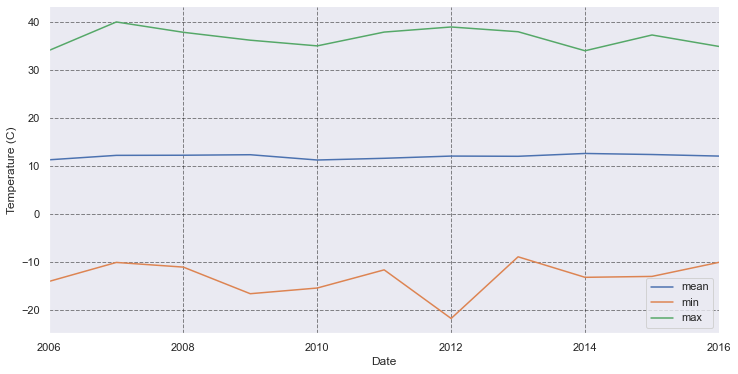

In [326]:
#temp=weather_data_train.loc[:,['Temperature (C)','year','month','day']]
#temp["Date"] = pd.to_datetime(temp[['year', 'month', 'day']])
#temp.set_index("Date", inplace=True)
#temp.drop(['year', 'month', 'day'], axis=1, inplace=True)
temp_annual = temp.resample("AS").agg(['mean', 'min', 'max']) #AS AS, YS    year start frequency WITH RESAMPLE METHOD
temp_annual.rename(columns={'Temperature (C)': 'temp'}, inplace=True)
temp_annual.temp.plot(figsize=(12, 6))
ax = plt.gca()
ax.grid(color= (0.1, 0.1, 0.1), linestyle='--', linewidth=1, alpha=0.5)
plt.autoscale(enable=True, axis='x', tight=True)
plt.ylabel("Temperature (C)")
sns.despine() #remove spines at right and top of figure


# COLDEST MONTH FOR THE COLDEST YEAR 2012

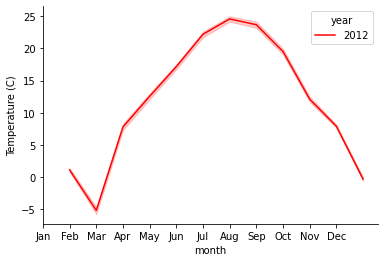

In [67]:
#COLDEST MONTH FOR THE COLDEST YEAR 2012
import calendar
s=sns.lineplot(x='month',y='Temperature (C)',palette=['red'],hue='year',data=weather_data_train.query('year==2012'))
months = [calendar.month_abbr[i] for i in range(1,13)]
s.set_xticks(range(12))
s.set_xticklabels(months)
sns.despine()

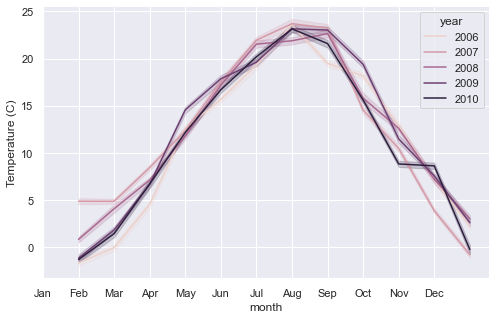

In [413]:
import calendar
s=sns.lineplot(x='month',y='Temperature (C)',hue='year',data=weather_data_train.query('year<2011'))
months = [calendar.month_abbr[i] for i in range(1,13)]
s.set_xticks(range(12))
s.set_xticklabels(months)
sns.despine()

# Univariate Analysis of Numerical Columns

<Figure size 576x576 with 0 Axes>

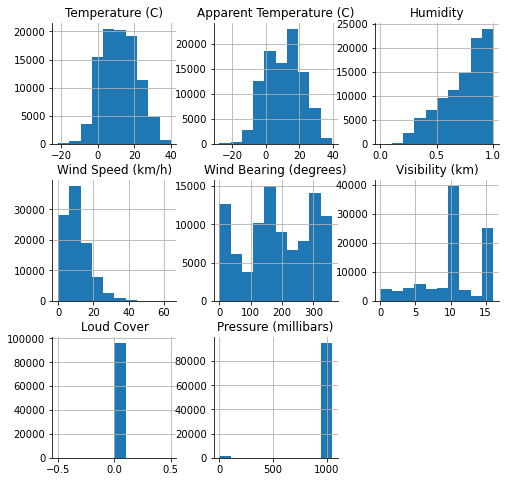

In [19]:
#HISTOGRAM FOR ALL NUMERICAL VARIABLES
plt.figure(figsize=(8,8)) #This makes the figure's width 8 inches, and its height 8 inches'
weather_data_train[quantitative].hist()
sns.despine()

# GOING THROUGH ALL COLUMNS

# Target: Temperature (C)

In [192]:
weather_data_train['Temperature (C)'].describe()

count    96429.000000
mean        11.929692
std          9.550492
min        -21.822222
25%          4.683333
50%         12.000000
75%         18.838889
max         39.905556
Name: Temperature (C), dtype: float64

In [193]:
weather_data_train['Apparent Temperature (C)'].describe()

count    96429.000000
mean        10.851707
std         10.695743
min        -27.716667
25%          2.311111
50%         12.000000
75%         18.838889
max         39.344444
Name: Apparent Temperature (C), dtype: float64

<AxesSubplot:>

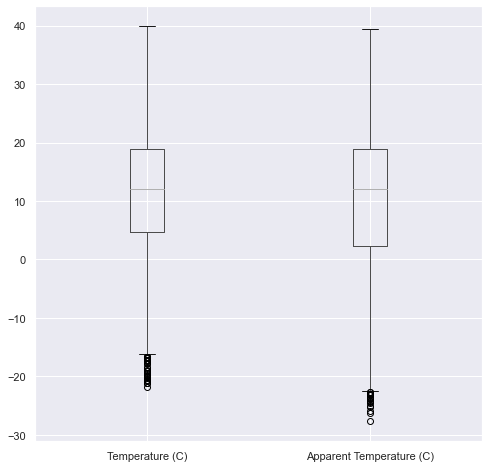

In [194]:
#BOX PLOT FOR  Temperature (C)', 'Apparent Temperature (C)'
#since the Y here are in both C ,combined them together in a single boxplot
weather_data_train[quantitative].boxplot(column=['Temperature (C)', 'Apparent Temperature (C)'])

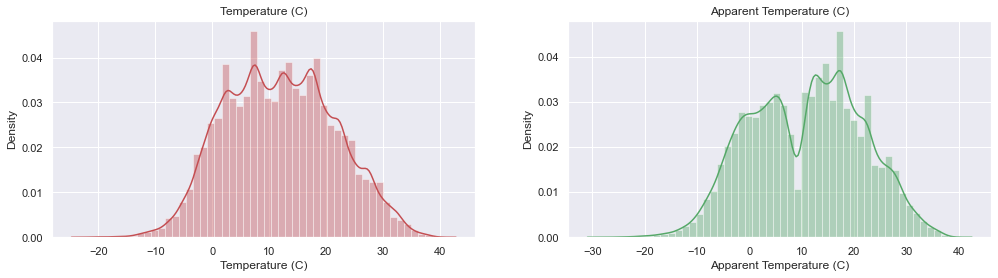

In [195]:
#DENSITY AND HISTOGRAM PLOTS FOR Temperature (C)', 'Apparent Temperature (C)'
# figsize() function to adjust the size
# og function
plt.subplots(figsize=(15, 5)) 
# using subplot function and creating 
# plot one
plt.subplot(1, 2, 1)
sns.distplot(weather_data_train['Temperature (C)'],color="r")
plt.title('Temperature (C)')
# using subplot function and creating plot two
plt.subplot(1, 2, 2)
sns.distplot(weather_data_train['Apparent Temperature (C)'],color="g")
plt.title('Apparent Temperature (C)') 
# spce between the plots
plt.tight_layout(4)  
# show plot
plt.show()

<AxesSubplot:xlabel='Humidity', ylabel='Density'>

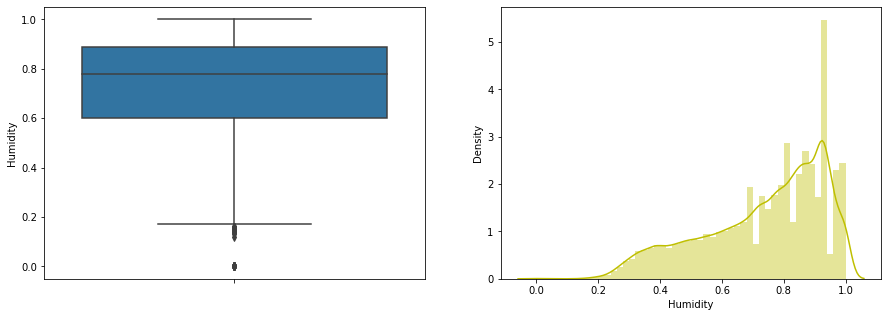

In [26]:
#DENSITY AND HISTOGRAM PLOTS FOR HUMIDITY
plt.subplots(figsize=(15, 5))
#print(weather_data_train['Humidity'].describe())
plt.subplot(1, 2, 1)
sns.boxplot(y=weather_data_train['Humidity'] )

plt.subplot(1, 2, 2)
sns.distplot(weather_data_train['Humidity'],color="y")

#Humidity seems to have outliers ,need to remove it using statistical method

In [ ]:
#Humidity seems to have outliers ,need to remove it using statistical method

In [76]:
#TO REMOVE THE OUTLIERS FOR HUMIDITY DATA
#lower inner fence: Q1 - 1.5*IQR
#upper inner weather_data_train_outfence: Q3 + 1.5*IQR
def outlier_analysis(col):
    Q1=weather_data_train[col].quantile(0.25)
    Q3=weather_data_train[col].quantile(0.75)
    IQR=Q3-Q1
    UIF=Q3+1.5*(IQR)#UIF=upper inner fence
    
    LIF=Q1-1.5*(IQR) #LIF=lower inner fence
    
    weather_data_train_out =weather_data_train[(weather_data_train[col]<LIF) | (weather_data_train[col]>UIF)] # I created a new data set that has just include potential outliers
   
    sns.distplot(weather_data_train_out[col])#Plotting univariate distributions.By default, this will draw a histogram and fit a kernel density estimate (KDE)
   
    return weather_data_train_out[col] .describe()

count    46.000000
mean      0.078043
std       0.075913
min       0.000000
25%       0.000000
50%       0.125000
75%       0.150000
max       0.160000
Name: Humidity, dtype: float64

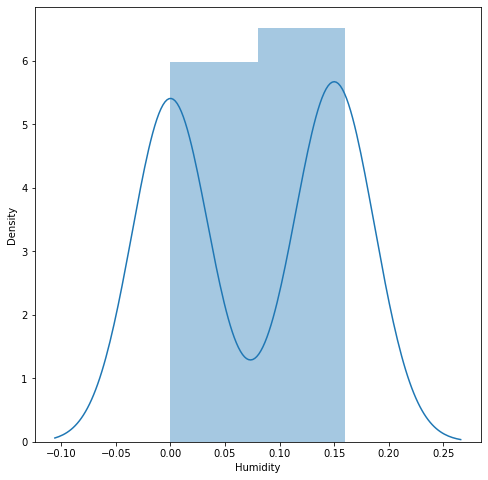

In [77]:
#TO REMOVE THE OUTLIERS FOR HUMIDITY DATA
outlier_analysis('Humidity')

In [78]:
df3=weather_data_train[(weather_data_train["Humidity"]<0.00) | (weather_data_train["Humidity"]>0.15)]


In [79]:
df3.shape

(96391, 15)

count    96429.000000
mean        10.812460
std          6.913345
min          0.000000
25%          5.828200
50%          9.965900
75%         14.135800
max         63.852600
Name: Wind Speed (km/h), dtype: float64


<AxesSubplot:xlabel='Wind Speed (km/h)', ylabel='Density'>

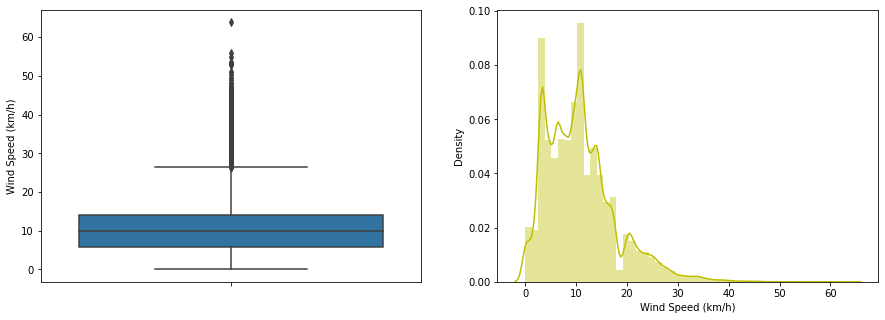

In [87]:
#TO REMOVE THE OUTLIERS FOR Wind Speed (km/h) DATA
plt.subplots(figsize=(15, 5))
print(weather_data_train['Wind Speed (km/h)'].describe())
plt.subplot(1, 2, 1)
sns.boxplot( y=weather_data_train['Wind Speed (km/h)'] )
plt.subplot(1, 2, 2)
sns.distplot(weather_data_train['Wind Speed (km/h)'],color="y")

count    96429.000000
mean       187.497506
std        107.376423
min          0.000000
25%        116.000000
50%        180.000000
75%        290.000000
max        359.000000
Name: Wind Bearing (degrees), dtype: float64


<AxesSubplot:xlabel='Wind Bearing (degrees)', ylabel='Density'>

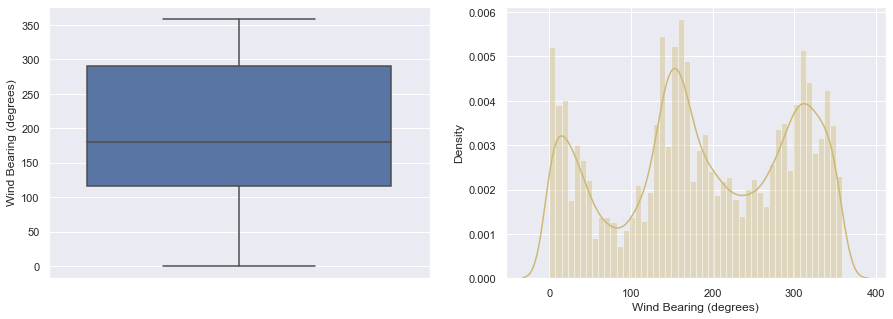

In [133]:
#DENSITY AND HISTOGRAM PLOTS FOR Wind Bearing (degrees)
plt.subplots(figsize=(15, 5))
print(weather_data_train['Wind Bearing (degrees)'].describe())
plt.subplot(1, 2, 1)
sns.boxplot( y=weather_data_train['Wind Bearing (degrees)'] )
plt.subplot(1, 2, 2)
sns.distplot(weather_data_train['Wind Bearing (degrees)'],color="y")

count    96429.000000
mean        10.347225
std          4.192548
min          0.000000
25%          8.339800
50%         10.046400
75%         14.812000
max         16.100000
Name: Visibility (km), dtype: float64


<AxesSubplot:xlabel='Visibility (km)', ylabel='Density'>

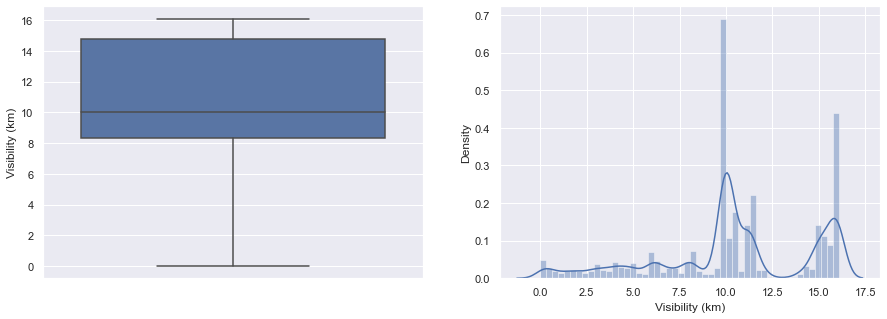

In [198]:
#DENSITY AND HISTOGRAM PLOTS FOR Visibility
plt.subplots(figsize=(15, 5))
print(weather_data_train['Visibility (km)'].describe())
plt.subplot(1, 2, 1)
sns.boxplot( y=weather_data_train['Visibility (km)'] )
plt.subplot(1, 2, 2)
sns.distplot(weather_data_train['Visibility (km)'],color="b")

In [80]:
#CORRELATION DATA #method='pearson'Correlation DEFAULT
weather_data_train[quantitative].corr()

Temperature (C)  Apparent Temperature (C)  Humidity  \
Temperature (C)                  1.000000                  0.992625 -0.632331   
Apparent Temperature (C)         0.992625                  1.000000 -0.602641   
Humidity                        -0.632331                 -0.602641  1.000000   
Wind Speed (km/h)                0.009312                 -0.056324 -0.225080   
Wind Bearing (degrees)           0.029888                  0.028926  0.000689   
Visibility (km)                  0.392939                  0.381804 -0.369282   
Loud Cover                            NaN                       NaN       NaN   
Pressure (millibars)            -0.005481                 -0.000251  0.005456   

                          Wind Speed (km/h)  Wind Bearing (degrees)  \
Temperature (C)                    0.009312                0.029888   
Apparent Temperature (C)          -0.056324                0.028926   
Humidity                          -0.225080                0.000689   
Wind Speed (km/h)                  1.000000                0.103939   
Wind Bearing (degrees)             0.103939                1.000000   
Visibility (km)                    0.100796                0.047582   
Loud Cover                              NaN                     NaN   
Pressure (millibars)              -0.049243               -0.011665   

                          Visibility (km)  Loud Cover  Pressure (millibars)  
Temperature (C)                  0.392939         NaN             -0.005481  
Apparent Temperature (C)         0.381804         NaN             -0.000251  
Humidity                        -0.369282         NaN              0.005456  
Wind Speed (km/h)                0.100796         NaN             -0.049243  
Wind Bearing (degrees)           0.047582         NaN             -0.011665  
Visibility (km)                  1.000000         NaN              0.059817  
Loud Cover                            NaN         NaN                   NaN  
Pressure (millibars)             0.059817         NaN              1.000000

<AxesSubplot:xlabel='Temperature (C)', ylabel='Visibility (km)'>

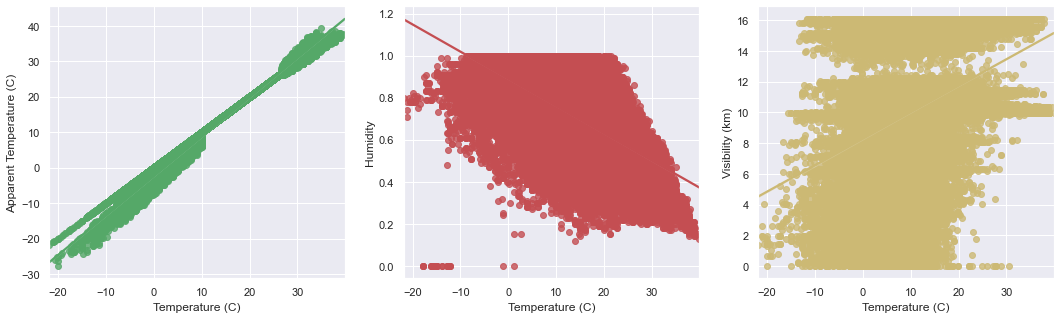

In [257]:
#Scatter Plot for between Target Column (i,e is Temperature (C) ;Humidity ; Visibility (km) )
plt.subplots(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.regplot(x=weather_data_train["Temperature (C)"], y=weather_data_train["Apparent Temperature (C)"],color="g")
plt.subplot(1, 3, 2)
sns.regplot(x=weather_data_train["Temperature (C)"], y=weather_data_train["Humidity"],color="r")
plt.subplot(1, 3, 3)
sns.regplot(x=weather_data_train["Temperature (C)"], y=weather_data_train["Visibility (km)"],color="y")

<AxesSubplot:xlabel='Temperature (C)', ylabel='Wind Speed (km/h)'>

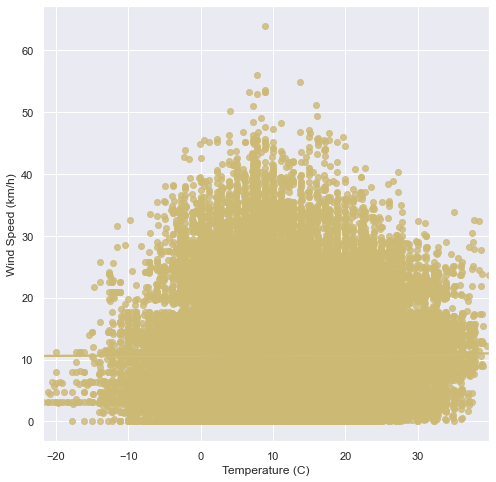

In [201]:
#Scatter Plot for between Target Column (i,e is Temperature (C) AND Wind Speed (km/h) )
sns.regplot(x=weather_data_train["Temperature (C)"], y=weather_data_train["Wind Speed (km/h)"],color="y")

<AxesSubplot:xlabel='Temperature (C)', ylabel='Wind Bearing (degrees)'>

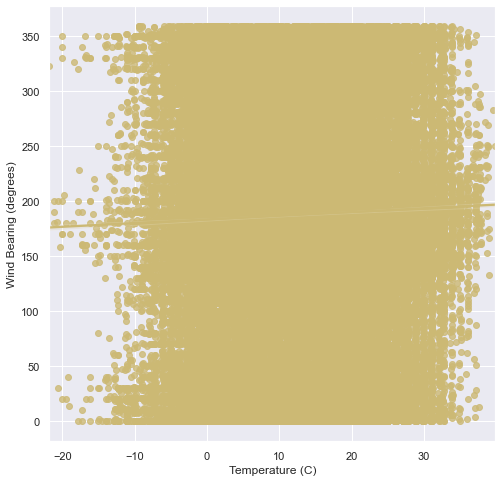

In [202]:
#Scatter Plot for between Target Column (i,e is Temperature (C) AND Wind Bearing (degrees) )
sns.regplot(x=weather_data_train["Temperature (C)"], y=weather_data_train["Wind Bearing (degrees)"],color="y")

# Categorical Variables

In [81]:
weather_data_train['Precip Type'].mode()[0]

'rain'

In [82]:
#DISTRIBUTION OF Precip Type
weather_data_train['Precip Type'].value_counts()

rain    85200
snow    10712
Name: Precip Type, dtype: int64

In [83]:
#to NaN variable to with mode of data ;517 missing data replaced with Precip Type Data
weather_data_train['Precip Type'].fillna(weather_data_train['Precip Type'].mode()[0], inplace=True)


In [84]:
# counting missing values
weather_data_train.apply(lambda x: sum(x.isnull()))

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
year                        0
month                       0
day                         0
dtype: int64

In [85]:
weather_data_train[qualitative].describe() #Precip Type   Missing values 517

Formatted Date        Summary Precip Type  \
count                       96429          96429       96429   
unique                      96429             27           2   
top     2008-02-23 10:00:00+01:00  Partly Cloudy        rain   
freq                            1          31726       85717   

                            Daily Summary  
count                               96429  
unique                                214  
top     Mostly cloudy throughout the day.  
freq                                20085

Text(0.5, 1, 'Bar chart for Precip Type')

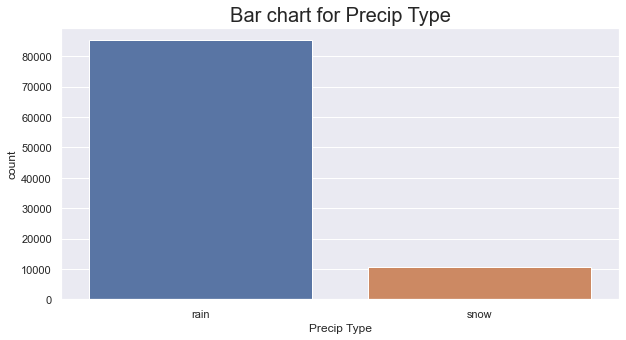

In [262]:
#COUNTPLOT FOR Precip Type
plt.subplots(figsize=(10, 5))
sns.countplot(df['Precip Type'])
plt.title("Bar chart for Precip Type", y=1, fontdict={"fontsize": 20})

# FOR MODELLING PURPOSE CONVERTED Precip Type TO NUMERICAL DATA

In [86]:
#to apply t test I am converting the Precip String Values to Numerical Values
weather_data_train['PType'] = np.where(weather_data_train['Precip Type']=='rain', 0, 1)
#weather_data_train.loc[weather_data_train['Precip Type'] == 'rain', 'PType'] = 0 
#weather_data_train.loc[weather_data_train['Precip Type'] == 'snow', 'PType'] = 1

In [87]:
weather_data_train.loc[(weather_data_train['Precip Type']=="snow")].head(2)

Formatted Date Summary Precip Type  Temperature (C)  \
1562  2006-12-13 02:00:00+01:00   Foggy        snow        -0.483333   
1563  2006-12-13 03:00:00+01:00   Foggy        snow        -0.483333   

      Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
1562                 -4.150000      1.00            11.0929   
1563                 -4.061111      0.96            10.7387   

      Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
1562                   219.0            0.483         0.0   
1563                   200.0            0.322         0.0   

      Pressure (millibars)              Daily Summary  year  month  day  PType  
1562               1031.56  Foggy throughout the day.  2006     12   13      1  
1563               1031.47  Foggy throughout the day.  2006     12   13      1

# T TEST (T TEST FOR INDEPENDENCE )
BETWEEN PRECIP TYPE(Categorical having 2  Values) AND TEMPERATURE(Continuous Value))

# H0:There is no statistically significant relationship between Precip Type and Temperature (C).#Ha:There is a statistically significant relationship between Precip Type and Temperature (C).

In [284]:
weather_data_train['PType'].describe()

count    96429.000000
mean         0.111087
std          0.314241
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: PType, dtype: float64

In [285]:
weather_data_train['Temperature (C)'].describe()

count    96429.000000
mean        11.929692
std          9.550492
min        -21.822222
25%          4.683333
50%         12.000000
75%         18.838889
max         39.905556
Name: Temperature (C), dtype: float64

In [91]:
from scipy.stats import ttest_ind

statistic, p_val = ttest_ind(weather_data_train['PType'],weather_data_train['Temperature (C)'],equal_var=False)

print('\nT value is : %f'%statistic, '\n\np_value is : %f'%p_val)

if p_val < 0.05:# consider significan level is 5%
        print("\nThere is some correlation between the two variables at significance level 0.05")
else:
        print("\nThere is no correlation between the two variables")


T value is : -384.069077 

p_value is : 0.000000

There is some correlation between the two variables at significance level 0.05


In [58]:
wf=weather_data_train.groupby("Precip Type")['Temperature (C)'].describe()
wf

count       mean       std        min       25%        50%  \
Precip Type                                                                 
rain         85200.0  13.850150  8.316479   0.005556  7.172222  13.266667   
snow         10712.0  -3.270885  3.075312 -21.822222 -4.861111  -2.311111   

                   75%        max  
Precip Type                        
rain         19.888889  39.905556  
snow         -1.094444   0.000000

Text(0, 0.5, 'Temprature')

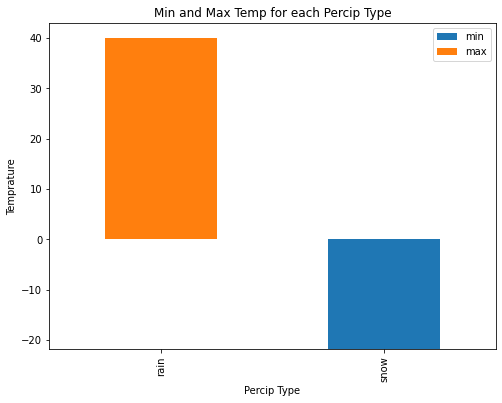

In [57]:
wf[['min','max']].plot.bar(stacked=True,figsize=(8, 6));
plt.title("Min and Max Temp for each Percip Type")
plt.xlabel("Percip Type")
plt.ylabel("Temprature")

<AxesSubplot:xlabel='Precip Type', ylabel='Temperature (C)'>

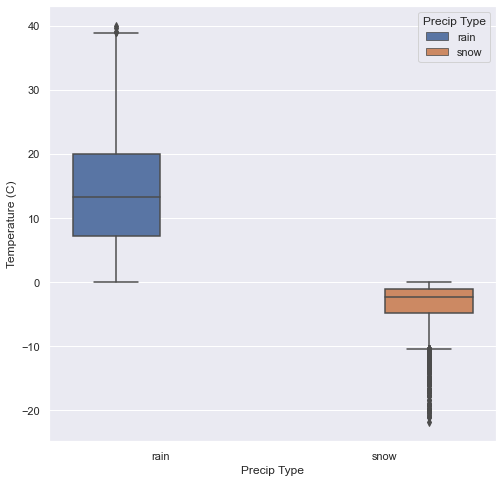

In [420]:
#BOXPLOT PROVIDES THE SUMMARY OF DISTRIBUTION OF THE Precip Type with Temprature Data
sns.boxplot(x='Precip Type',y='Temperature (C)',data=weather_data_train,hue='Precip Type')

<AxesSubplot:xlabel='count', ylabel='Summary'>

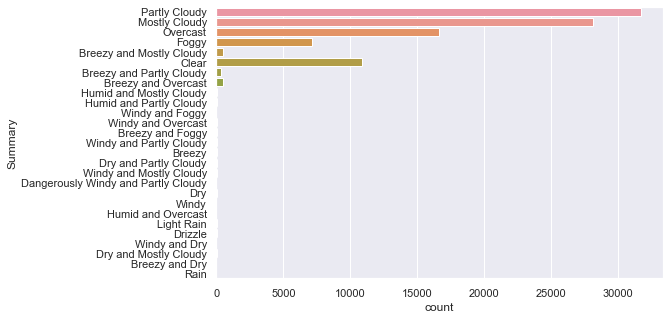

In [307]:
#DISTRIBUTION OF SUMMARY DATA TYPE(27 TYPES)
plt.figure(figsize=(8,5)) #This makes the figure's width 8 inches, and its height 8 inches'
sns.countplot(y=weather_data_train['Summary'])

In [61]:
weather_data_train.head(3)

Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00+02:00  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00+02:00  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00+02:00  Mostly Cloudy        rain         9.377778   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13   
1                   259.0          15.8263         0.0               1015.63   
2                   204.0          14.9569         0.0               1015.94   

                       Daily Summary  PType  year  month  day  
0  Partly cloudy throughout the day.      0  2006      4    1  
1  Partly cloudy throughout the day.      0  2006      4    1  
2  Partly cloudy throughout the day.      0  2006      4    1

In [312]:
temp=weather_data_train.loc[:,['Temperature (C)','year','month','day']]
print(type(temp))

<class 'pandas.core.frame.DataFrame'>


In [313]:
temp["Date"] = pd.to_datetime(temp[['year', 'month', 'day']])
temp.set_index("Date", inplace=True)
temp.drop(['year', 'month', 'day'], axis=1, inplace=True)
temp.head(3)

Temperature (C)
Date                       
2006-04-01         9.472222
2006-04-01         9.355556
2006-04-01         9.377778

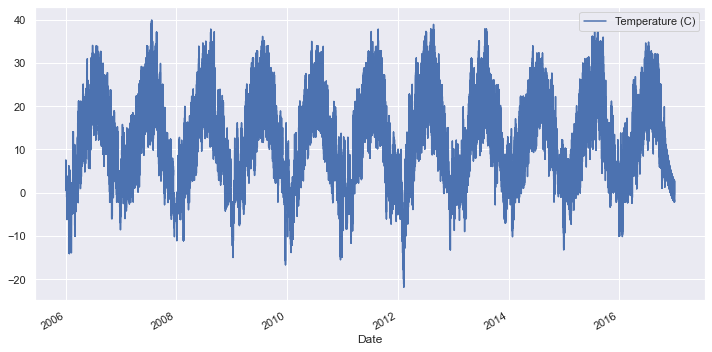

In [314]:
temp.plot(figsize=(12, 6));

In [318]:
temp_annual = temp.resample("AS").agg(['mean', 'min', 'max']) #AS AS, YS    year start frequency WITH RESAMPLE METHOD
temp_annual.rename(columns={'Temperature (C)': 'temp'}, inplace=True)
temp_annual.head(5)

temp                      
                 mean        min        max
Date                                       
2006-01-01  11.215365 -14.088889  34.005556
2007-01-01  12.135239 -10.155556  39.905556
2008-01-01  12.161876 -11.127778  37.755556
2009-01-01  12.267910 -16.666667  36.111111
2010-01-01  11.167181 -15.483333  34.927778

In [341]:
#coldest day in the year 2012
temp_annual[:]['temp']

mean        min        max
Date                                       
2006-01-01  11.215365 -14.088889  34.005556
2007-01-01  12.135239 -10.155556  39.905556
2008-01-01  12.161876 -11.127778  37.755556
2009-01-01  12.267910 -16.666667  36.111111
2010-01-01  11.167181 -15.483333  34.927778
2011-01-01  11.524453 -11.700000  37.800000
2012-01-01  11.986726 -21.822222  38.861111
2013-01-01  11.940719  -8.983333  37.872222
2014-01-01  12.529737 -13.255556  33.911111
2015-01-01  12.311370 -13.066667  37.194444
2016-01-01  11.985292 -10.133333  34.811111

In [345]:
#RESAMPLE FOR MONTHLY DATA
temp_monthly = temp.resample("MS").agg(['mean', 'min', 'max']) 
temp_monthly.rename(columns={'Temperature (C)': 'temp'}, inplace=True)

<AxesSubplot:xlabel='Date'>

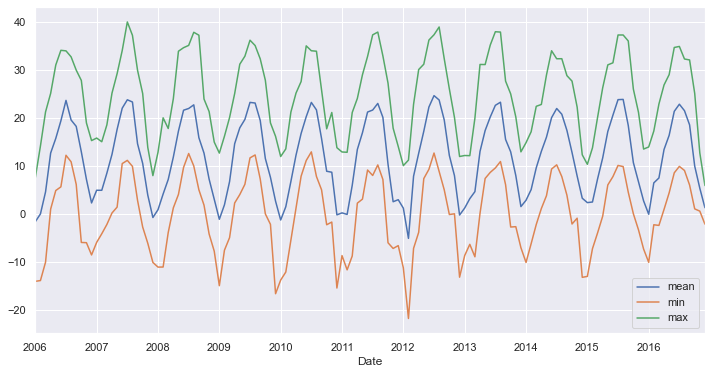

In [346]:
temp_monthly.temp.plot(figsize=(12, 6))

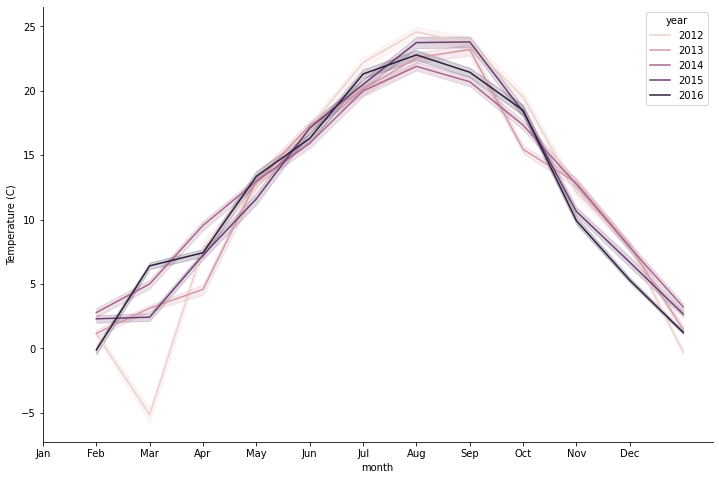

In [72]:
import calendar
plt.subplots(figsize=(12,8))

s=sns.lineplot(x='month',y='Temperature (C)',hue='year',data=weather_data_train.query('year>2011'))
months = [calendar.month_abbr[i] for i in range(1,13)]
s.set_xticks(range(12))
s.set_xticklabels(months)
sns.despine()

In [91]:
#Chossen df3 because the humidity has been removed
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96391 entries, 0 to 96452
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96391 non-null  object 
 1   Summary                   96391 non-null  object 
 2   Precip Type               95874 non-null  object 
 3   Temperature (C)           96391 non-null  float64
 4   Apparent Temperature (C)  96391 non-null  float64
 5   Humidity                  96391 non-null  float64
 6   Wind Speed (km/h)         96391 non-null  float64
 7   Wind Bearing (degrees)    96391 non-null  float64
 8   Visibility (km)           96391 non-null  float64
 9   Loud Cover                96391 non-null  float64
 10  Pressure (millibars)      96391 non-null  float64
 11  Daily Summary             96391 non-null  object 
 12  PType                     96391 non-null  int32  
 13  year                      96391 non-null  int64  
 14  month 

# Before Modeling ,Splitting the Target Variable into y and OTHER INDEPENDENT Variables TO X 

In [50]:
#Use the method train_test_split to split the dataset into following y(for predicting) and X(Independent features)
y=df3.loc[:,['Temperature (C)']]
X=df3.loc[:,['Humidity','PType']]

In [38]:
X

Apparent Temperature (C)  Humidity  PType
0                      7.388889      0.89      0
1                      7.227778      0.86      0
2                      9.377778      0.89      0
3                      5.944444      0.83      0
4                      6.977778      0.83      0
...                         ...       ...    ...
96448                 26.016667      0.43      0
96449                 24.583333      0.48      0
96450                 22.038889      0.56      0
96451                 21.522222      0.60      0
96452                 20.438889      0.61      0

[96391 rows x 3 columns]

In [39]:
y

Temperature (C)
0             9.472222
1             9.355556
2             9.377778
3             8.288889
4             8.755556
...                ...
96448        26.016667
96449        24.583333
96450        22.038889
96451        21.522222
96452        20.438889

[96391 rows x 1 columns]

In [51]:
#Splitting the dataset into the training set and test set with a 80:20 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [41]:
X_train

Apparent Temperature (C)  Humidity  PType
53164                 11.111111      0.74      0
58803                 17.777778      0.81      0
21440                 19.633333      0.67      0
14680                 26.400000      0.34      0
91140                  4.700000      0.99      0
...                         ...       ...    ...
21255                 29.200000      0.35      0
45931                  7.061111      0.84      0
42653                  7.850000      1.00      0
43607                 12.083333      0.91      0
68328                  3.044444      0.93      0

[77112 rows x 3 columns]

In [42]:
X_test

Apparent Temperature (C)  Humidity  PType
72067                 -3.155556      0.77      0
81086                  3.022222      0.87      0
52488                 22.044444      0.45      0
10392                 -9.844444      0.78      1
58874                 17.550000      0.69      1
...                         ...       ...    ...
13675                 24.972222      0.32      0
36226                 22.133333      0.64      0
64990                 -9.111111      0.81      1
55675                 -5.716667      0.63      1
7513                   1.000000      0.83      0

[19279 rows x 3 columns]

In [43]:
y_train

Temperature (C)
53164        11.111111
58803        17.777778
21440        19.633333
14680        26.400000
91140         7.305556
...                ...
21255        30.050000
45931         8.977778
42653         7.850000
43607        12.083333
68328         5.433333

[77112 rows x 1 columns]

In [44]:
y_test

Temperature (C)
72067         1.150000
81086         4.933333
52488        22.044444
10392        -4.538889
58874        17.550000
...                ...
13675        24.972222
36226        22.133333
64990        -4.727778
55675        -1.005556
7513          3.950000

[19279 rows x 1 columns]

# we import the library LinearRegression from sklearn.linear_model. Create a regressor object and then try and fit the training data.

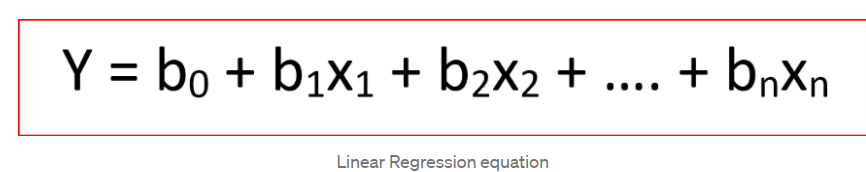

In [52]:
#we import the library LinearRegression from sklearn.linear_model. Create a regressor object and then try and fit the training data.
from sklearn.linear_model import LinearRegression
regressor =LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [54]:
#REGRESSOR COOEFICIENT
regressor.coef_

array([[-26.29366198, -12.79063655]])

In [55]:
regressor.intercept_ #intercept b0

# 0.850 is the b1 where x1 is apparent temperature
#-2.648 is b2 where x2 is humidity
#-0.355 is b3 where x3 is Ptype
#temperature = 4.77 + (apparent temperature * 0.850) + (-2.75 * humidity) + (-0.355 * Precip Type)

array([32.75480044])

In [56]:
#PREDICTION AFTER FITTING THE MODEL
y_pred = regressor.predict(X_test)

In [49]:
y_pred

array([[-0.03341506],
       [ 4.94218423],
       [22.27098003],
       ...,
       [-5.56176164],
       [-2.17967263],
       [ 3.33352759]])

# BEST FIT MODEL
A good fitting model is one where the difference between the actual or observed values and predicted values based on the model are small and unbiased.
so if some statistics tells us that the difference between the actual and predicted values are small then we know that the model we built is a good one.

# r² gives us a measure of how well the actual outcomes are replicated by the model or the regression line
#R² is always between 0 and 1 or between 0% to 100%.
#A value of 1 means that the model explains all the variation in predicted variable around its mean.
#A value close to 1 for r² means a good fit.

In [57]:
#Applying adjusted R²
regressor.score(X,y)

0.5789929960926422

In [ ]:
print('The equation of this Linear Regression has format : y= intercept + coefficient*Features ')
print('Linear model intercept: {} and the coefficients are: {}'
     .format(model.intercept_,model.coef_))